In [1]:
# dataframes 
import numpy as np
# import pandas as pd
import polars as pd

# cargar archivos
import uproot
from tqdm import tqdm # sirve para ver la linea de carga al cargar los archivos
import yaml

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# funcion de xgboost que clasifica
from xgboost import XGBClassifier
import xgboost as xgb

# graficar el arbol de desiciones del modelo, rcparams es para que se vea HD
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# medir que tan bueno es el modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# encontrar mejor modelo (validacion)
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

# ver la prueba de ks
from scipy.stats import kstest

# funciones creadas
import sys
sys.path.append('../') # los archivos están en la carpeta anterior
from lectura import *
from formulas import *
from cortes import *
from graficar import *
from machine_learning import *
from metricas import *

# para recargar los modulos mientras los voy debugeando
%load_ext autoreload
%autoreload 2

In [2]:
########################################################
########### LECTURA DATOS PREVIOS YAML #################
########################################################

# cargar archivo yaml
path = "/home/tomilee/Desktop/Universidad/dark_photons/proyecto_investigacion/codigo/"
data_yaml = read_data_yaml('../parametros_ml_after_cut.yaml')      #Parámetros del calo

# de data_yaml obtenemos los nombres de los datasets
vbf_data = data_yaml['VBF'].values() #esto devuelve solo los valores de cada variable.
ggf_data = data_yaml['ggF'].values() #esto devuelve solo los valores de cada variable.

# de data_yaml obtenemos los nombres de las variables
variables = data_yaml['recover_branches']
# de data_yaml obtenemos las escalas de las variables
scales = data_yaml['scale_variable']

# de data_yaml obtenemos los nombres de los cortes y los valores de los cortes menores y mayores
cuts = data_yaml['cuts']

In [3]:
########################################################
############# LECTURA DATOS ROOT FILES #################
########################################################
df_all = read_datasets(vbf_data, ggf_data, variables, scales, path)
df_all

 12%|█▎        | 1/8 [00:00<00:01,  3.63it/s]

samples/VBF/frvz_vbf_500757


 25%|██▌       | 2/8 [00:00<00:01,  3.74it/s]

samples/VBF/frvz_vbf_500758


 38%|███▊      | 3/8 [00:00<00:01,  3.51it/s]

samples/VBF/frvz_vbf_500759


 50%|█████     | 4/8 [00:01<00:01,  3.72it/s]

samples/VBF/frvz_vbf_500760


 62%|██████▎   | 5/8 [00:01<00:00,  3.81it/s]

samples/VBF/frvz_vbf_500761


 75%|███████▌  | 6/8 [00:01<00:00,  3.88it/s]

samples/VBF/frvz_vbf_500762


 88%|████████▊ | 7/8 [00:01<00:00,  3.93it/s]

samples/VBF/frvz_vbf_500763


100%|██████████| 8/8 [00:02<00:00,  3.84it/s]


samples/VBF/frvz_vbf_500764


100%|██████████| 9/9 [00:04<00:00,  2.02it/s]


njet30          mjj      detajj  \
origin df_name                                                        
VBF    samples/VBF/frvz_vbf_500757       2  1316.194214    5.130603   
       samples/VBF/frvz_vbf_500757       7  2287.880371    7.156201   
       samples/VBF/frvz_vbf_500757       2  1568.506470    6.255918   
       samples/VBF/frvz_vbf_500757       4   471.740875    1.960242   
       samples/VBF/frvz_vbf_500757       8  1150.059692    4.557185   
...                                    ...          ...         ...   
ggF    samples/ggF/frvz_ggf_508893       1    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       3   240.689178    1.942230   
       samples/ggF/frvz_ggf_508893       2   143.422470    2.548514   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   

                                        dphijj         MET  scale1fb  \
origin df_name                                                         
VBF    samples/VBF/frvz_vbf_500757    1.032967  177.043106  0.000486   
       samples/VBF/frvz_vbf_500757   -2.580441  101.195091  0.000502   
       samples/VBF/frvz_vbf_500757   -1.375577  130.909744  0.000429   
       samples/VBF/frvz_vbf_500757    2.980181  491.291687  0.000531   
       samples/VBF/frvz_vbf_500757    2.197970  115.439743  0.000014   
...                                        ...         ...       ...   
ggF    samples/ggF/frvz_ggf_508893 -999.000000   40.554482  0.028479   
       samples/ggF/frvz_ggf_508893    0.768057   76.802452  0.029882   
       samples/ggF/frvz_ggf_508893    2.000947   26.644657  0.029517   
       samples/ggF/frvz_ggf_508893 -999.000000   10.709071  0.029929   
       samples/ggF/frvz_ggf_508893 -999.000000   10.808948  0.030318   

                                      intLumi        jet1_pt    jet1_eta  \
origin df_name                                                             
VBF    samples/VBF/frvz_vbf_500757  44.299999  104969.406250   -3.187121   
       samples/VBF/frvz_vbf_500757  44.299999   72039.820312    3.637084   
       samples/VBF/frvz_vbf_500757  44.299999  120273.304688   -2.382490   
       samples/VBF/frvz_vbf_500757  44.299999  178915.984375    1.259632   
       samples/VBF/frvz_vbf_500757  44.299999  189834.156250   -2.913896   
...                                       ...            ...         ...   
ggF    samples/ggF/frvz_ggf_508893  58.450001   33552.746094    0.995871   
       samples/ggF/frvz_ggf_508893  58.450001  125251.289062   -2.288580   
       samples/ggF/frvz_ggf_508893  58.450001   40318.128906   -3.305732   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   

                                      jet1_phi        jet1_e        jet2_pt  \
origin df_name                                                                
VBF    samples/VBF/frvz_vbf_500757   -0.087903  1.273288e+06   98169.875000   
       samples/VBF/frvz_vbf_500757    0.712928  1.369027e+06   56599.265625   
       samples/VBF/frvz_vbf_500757   -2.404870  6.569827e+05   39280.699219   
       samples/VBF/frvz_vbf_500757   -2.167910  3.411552e+05  133583.312500   
       samples/VBF/frvz_vbf_500757   -1.059290  1.754382e+06   72083.078125   
...                                        ...           ...            ...   
ggF    samples/ggF/frvz_ggf_508893   -2.499207  5.242589e+04    -999.000000   
       samples/ggF/frvz_ggf_508893    1.335905  6.239932e+05   79405.820312   
       samples/ggF/frvz_ggf_508893    0.382778  5.504859e+05   36411.175781   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   

                                      jet2_eta    jet2_phi        jet2_e  
origin df_name                                                            
VBF    s

In [4]:
#################################################################
#################### PROCESAMIENTO DE DATOS #####################
#################################################################

# hago los cortes definitivos
df_all_cut = do_cuts(df_all, cuts, scales)

# modifico df_all para aplicar ml
df_ml = df_all_cut
df_ml = df_ml.droplevel('df_name')
df_ml = df_ml.drop(['njet30', 'scale1fb', 'intLumi'], axis=1) # omito njet30, intlumi y scale1f
df_ml = df_ml.reset_index(level='origin')
df_ml = pd.get_dummies(df_ml, columns=['origin'], dtype=int)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml.drop(['origin_VBF', 'origin_ggF'], axis=1) 
df_y = df_ml[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3)#, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5)

df_ml

Numero eventos antes: 4628576
Corte: njet30 entre [1, inf]
Numero eventos despues: 2013265 



,mjj,detajj,dphijj,MET,jet1_pt,jet1_eta,jet1_phi,jet1_e,jet2_pt,jet2_eta,jet2_phi,jet2_e,origin_VBF,origin_ggF
0,1316.194214,5.130603,1.032967,177.043106,104969.406250,-3.187121,-0.087903,1.273288e+06,98169.875000,1.943482,-1.120870,3.498132e+05,1,0
1,2287.880371,7.156201,-2.580441,101.195091,72039.820312,3.637084,0.712928,1.369027e+06,56599.265625,-3.519117,-2.989815,9.561007e+05,1,0
2,1568.506470,6.255918,-1.375577,130.909744,120273.304688,-2.382490,-2.404870,6.569827e+05,39280.699219,3.873428,-1.029293,9.452691e+05,1,0
3,471.740875,1.960242,2.980181,491.291687,178915.984375,1.259632,-2.167910,3.411552e+05,133583.312500,3.219874,1.135094,1.674184e+06,1,0
4,1150.059692,4.557185,2.197970,115.439743,189834.156250,-2.913896,-1.059290,1.754382e+06,72083.078125,1.643289,3.025926,1.938794e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012571,86.820213,0.779352,3.074377,36.471001,45681.097656,3.302509,-0.662832,6.216837e+05,35162.062500,2.523157,2.545976,2.206442e+05,0,1
2012572,69.304848,0.293507,-2.302855,5.845552,40501.546875,1.277558,-3.141293,7.845353e+04,33459.644531,0.984051,-0.838438,5.148936e+04,0,1
2012573,506.555878,2.252506,-3.031298,27.214394,152246.031250,1.397108,1.148800,3.269545e+05,144588.734375,-0.855398,-2.103087,2.015532e+05,0,1
2012574,240.689178,1.942230,0.768057,76.802452,125251.289062,-2.288580,1.335905,6.239932e+05,79405.820312,-0.346350,0.567848,8.514269e+04,0,1


In [47]:
2013265/4628576 # eficiencia de njet30>1

0.434964230899525

In [5]:
df_ml['origin_ggF']
df_ml2 = df_ml.drop(['jet2_eta', 'jet1_eta', 'jet2_phi', 'MET', 'origin_ggF', 'dphijj', 'jet1_phi'], axis=1)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml2.drop(['origin_VBF'], axis=1) 
df_y = df_ml2[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3, random_state=228)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5, random_state=228)
# X_test, y_test = X_metrico, y_metrico 

df_ml2

,mjj,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e,origin_VBF
0,1316.194214,5.130603,104969.406250,1.273288e+06,98169.875000,3.498132e+05,1
1,2287.880371,7.156201,72039.820312,1.369027e+06,56599.265625,9.561007e+05,1
2,1568.506470,6.255918,120273.304688,6.569827e+05,39280.699219,9.452691e+05,1
3,471.740875,1.960242,178915.984375,3.411552e+05,133583.312500,1.674184e+06,1
4,1150.059692,4.557185,189834.156250,1.754382e+06,72083.078125,1.938794e+05,1
...,...,...,...,...,...,...,...
2012571,86.820213,0.779352,45681.097656,6.216837e+05,35162.062500,2.206442e+05,0
2012572,69.304848,0.293507,40501.546875,7.845353e+04,33459.644531,5.148936e+04,0
2012573,506.555878,2.252506,152246.031250,3.269545e+05,144588.734375,2.015532e+05,0
2012574,240.689178,1.942230,125251.289062,6.239932e+05,79405.820312,8.514269e+04,0


mjj


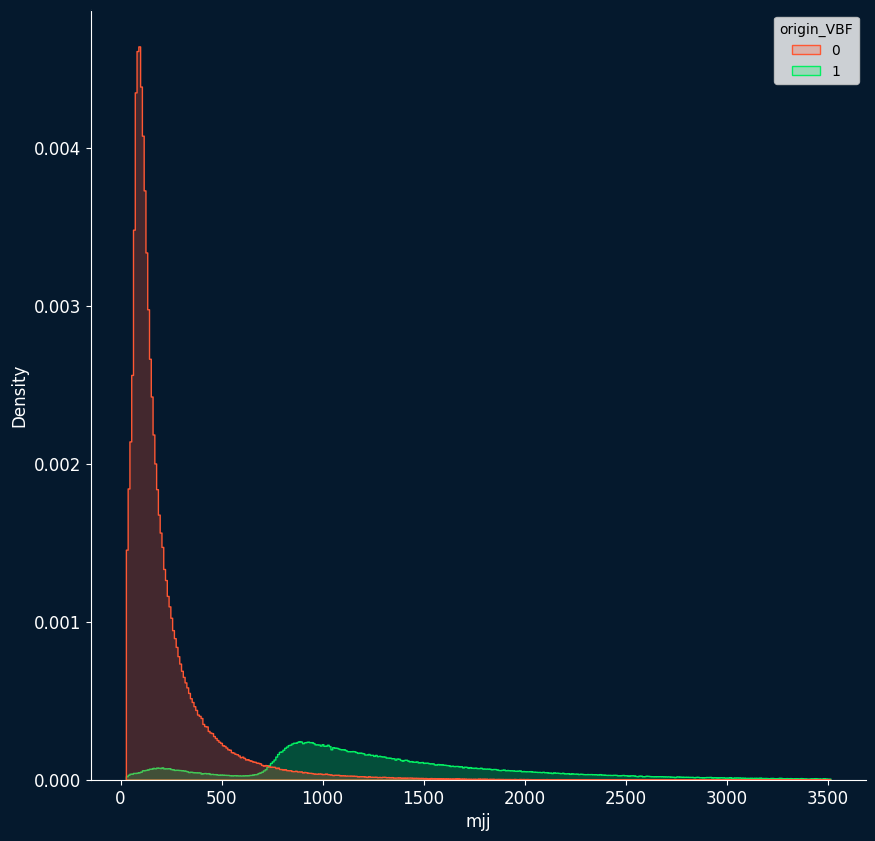

detajj


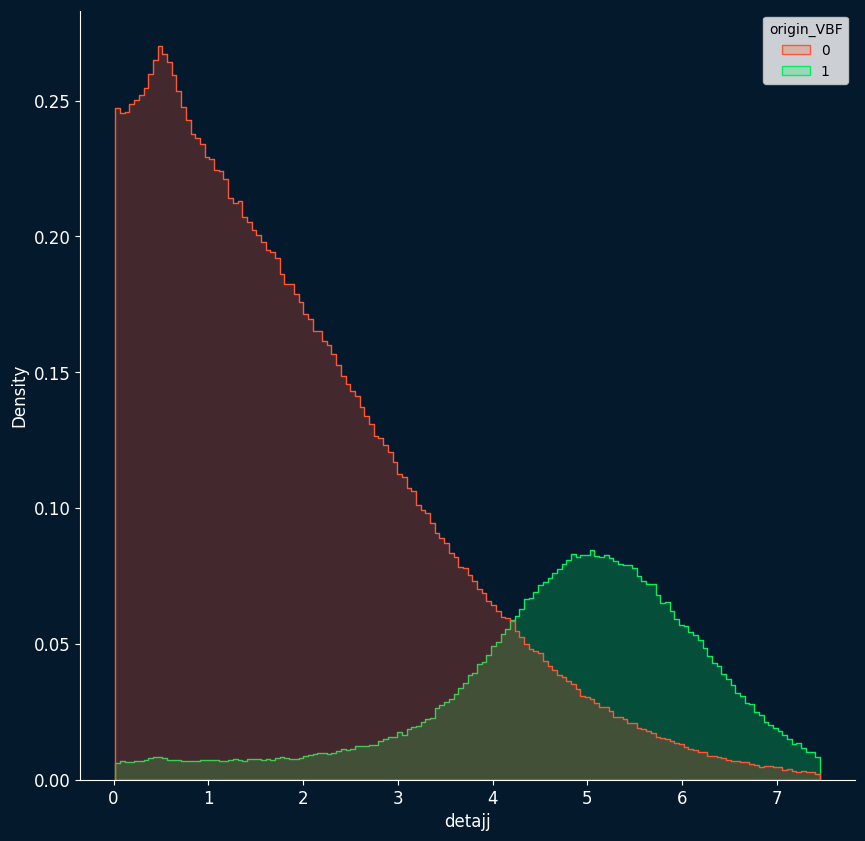

jet1_pt


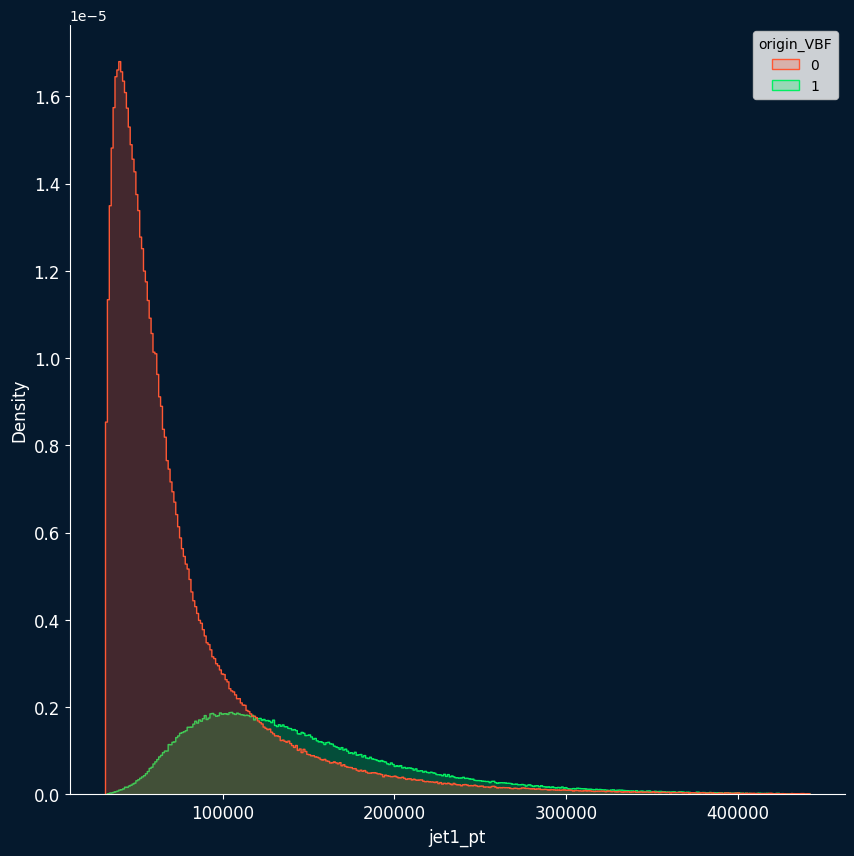

jet1_e


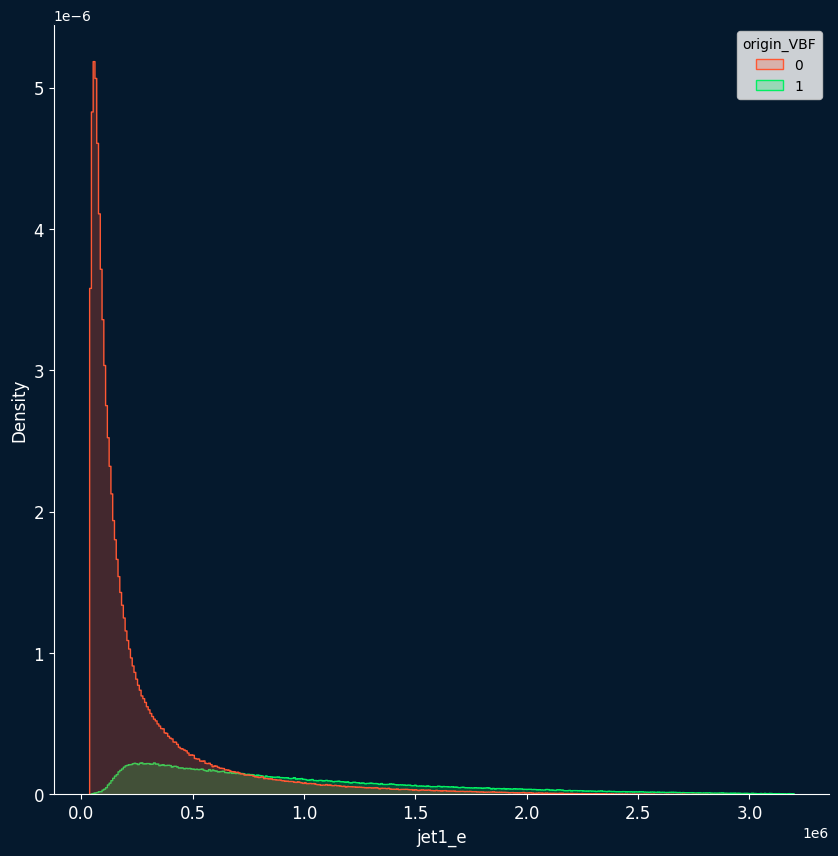

jet2_pt


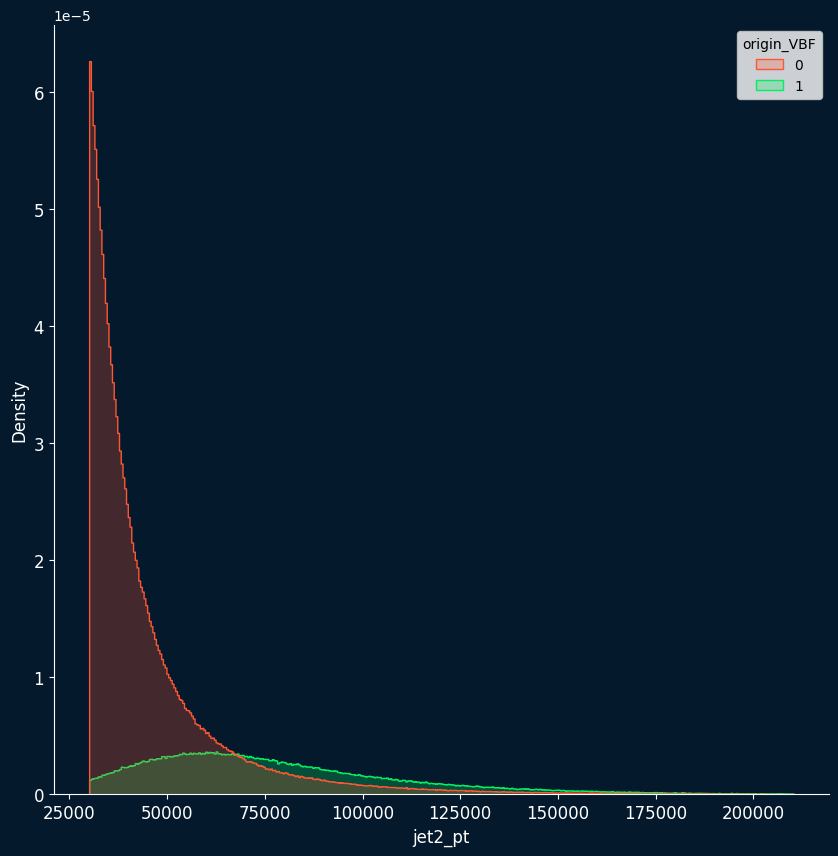

jet2_e


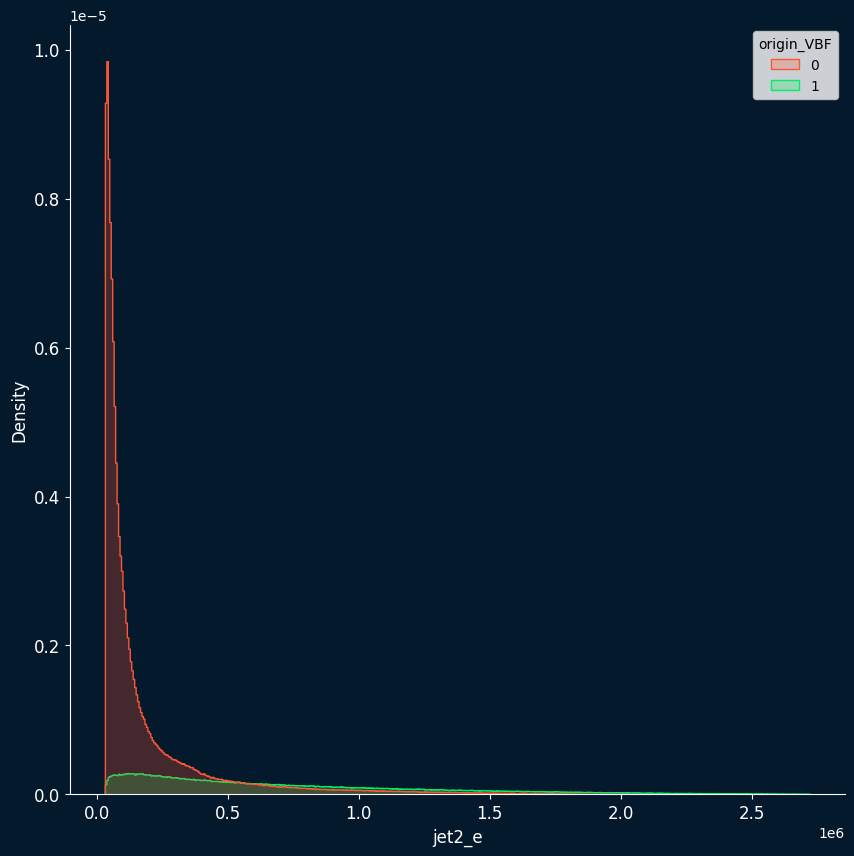

origin_VBF


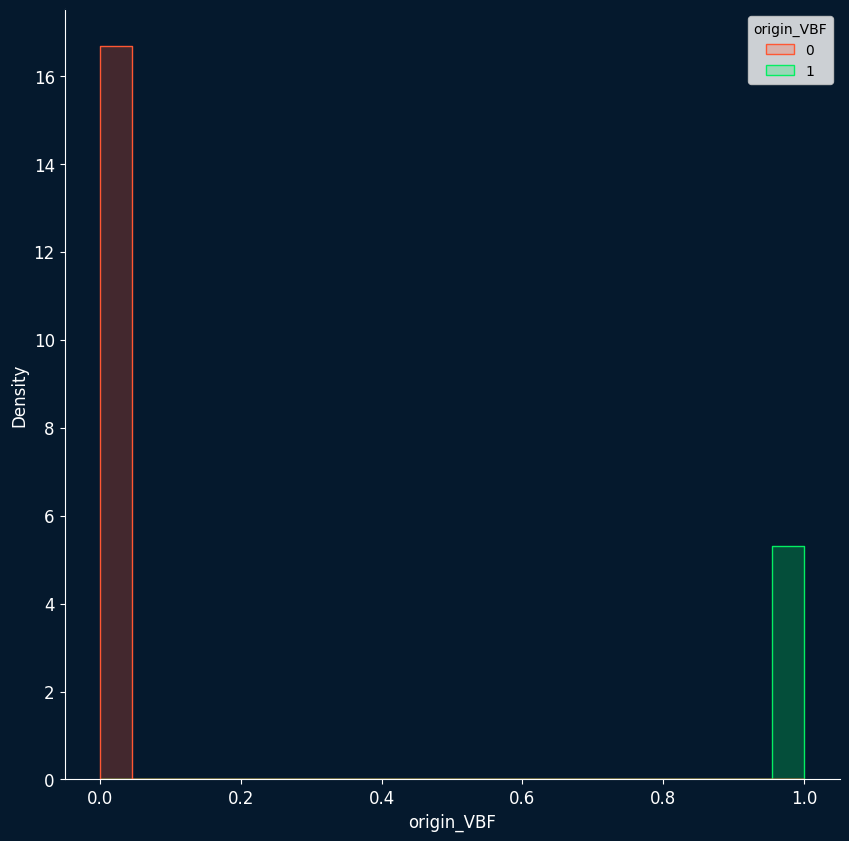

In [6]:
graficar_todos_datos(df_ml2, color='origin_VBF')

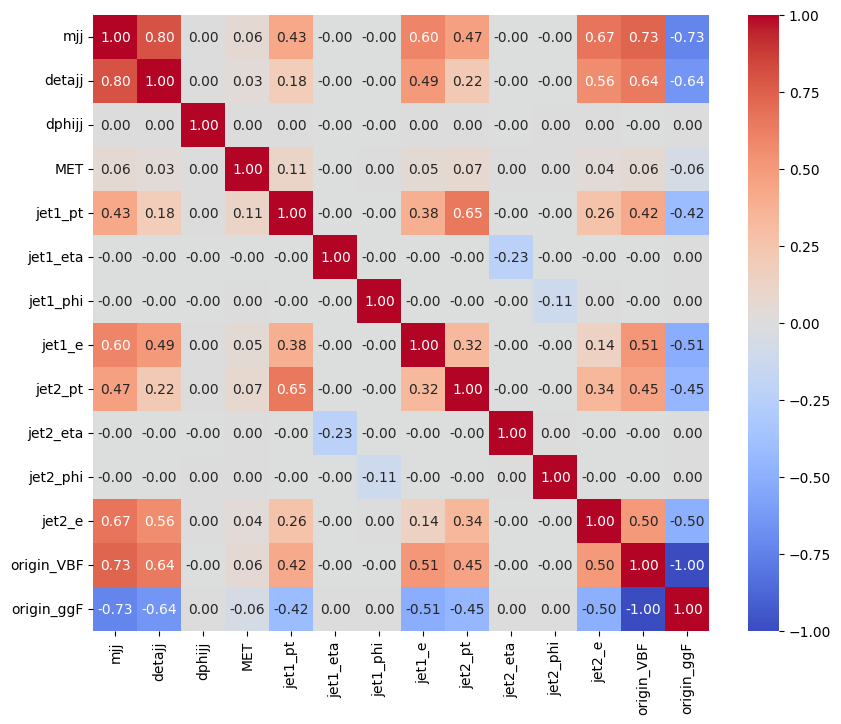

In [7]:
plot_correlacion(df_ml)

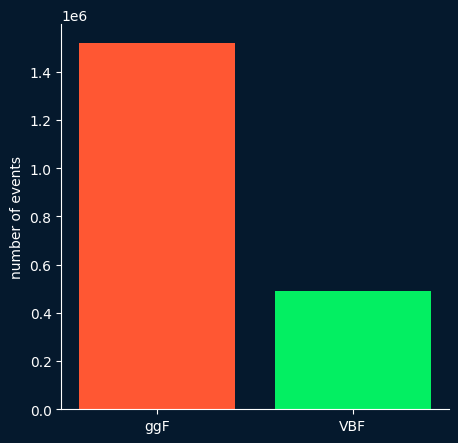

In [8]:
n_ggF = df_ml2[df_ml2["origin_VBF"] == 0].count()[0]
n_VBF = df_ml2[df_ml2["origin_VBF"] == 1].count()[0]
plot_cantidad_ggf_vbf(n_ggF, n_VBF)

# DEEP LEARNING

In [9]:
# Normalizar los datos
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Definir el modelo de la red neuronal
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(6,)),  # 4 características en el conjunto de datos Iris
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con función de activación sigmoide para clasificación binaria
# ])

# # Compilar el modelo
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# print(y_train.shape)

# # Entrenar el modelo
# model.fit(X_train, y_train, epochs=40, batch_size=16, validation_split=0.1)

# # Evaluar el modelo en el conjunto de prueba
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')

In [10]:
from bokbokbok.eval_metrics.classification import F1_Score_Binary
from sklearn.metrics import f1_score

params = {'seed': 123,
          "learning_rate":0.1,
          "max_depth":7,
          # "n_estimators":500,
          "eval_metric":["logloss", "auc"],
          "verbosity":2,
          "objective":"binary:logistic",
          "gamma":0.1, # esto es para evitar el sobreajuste, limita la creacion de ramas
          # 'disable_default_eval_metric': 1, # no usa las metricas de evaluacion que puse arribita (eval_metric)
        #   "device":"cuda"
          }

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val, y_val)

modelo_boost = xgb.train(params,
          dtrain=dtrain,
          num_boost_round=100,
          early_stopping_rounds=10,
          verbose_eval=10,
          maximize=True,
          custom_metric=F1_Score_Binary(average='binary', XGBoost=True),
          # custom_metric=f1_score(average='micro'),
          evals=[(dtrain, 'dtrain'), (dvalid, 'dvalid')])

model = XGBRegressor()
model._Booster = modelo_boost

[0]	dtrain-logloss:0.48903	dtrain-auc:0.97343	dtrain-F1:0.00000	dvalid-logloss:0.48887	dvalid-auc:0.97309	dvalid-F1:0.00000
[10]	dtrain-logloss:0.23879	dtrain-auc:0.97620	dtrain-F1:0.87789	dvalid-logloss:0.23898	dvalid-auc:0.97586	dvalid-F1:0.87824
[20]	dtrain-logloss:0.18127	dtrain-auc:0.97659	dtrain-F1:0.88097	dvalid-logloss:0.18183	dvalid-auc:0.97618	dvalid-F1:0.88028
[30]	dtrain-logloss:0.16527	dtrain-auc:0.97686	dtrain-F1:0.88173	dvalid-logloss:0.16613	dvalid-auc:0.97639	dvalid-F1:0.88113
[40]	dtrain-logloss:0.16067	dtrain-auc:0.97705	dtrain-F1:0.88210	dvalid-logloss:0.16181	dvalid-auc:0.97650	dvalid-F1:0.88155
[50]	dtrain-logloss:0.15919	dtrain-auc:0.97721	dtrain-F1:0.88235	dvalid-logloss:0.16061	dvalid-auc:0.97655	dvalid-F1:0.88174
[60]	dtrain-logloss:0.15854	dtrain-auc:0.97734	dtrain-F1:0.88260	dvalid-logloss:0.16025	dvalid-auc:0.97659	dvalid-F1:0.88199
[70]	dtrain-logloss:0.15814	dtrain-auc:0.97746	dtrain-F1:0.88275	dvalid-logloss:0.16015	dvalid-auc:0.97661	dvalid-F1:0.88205
[

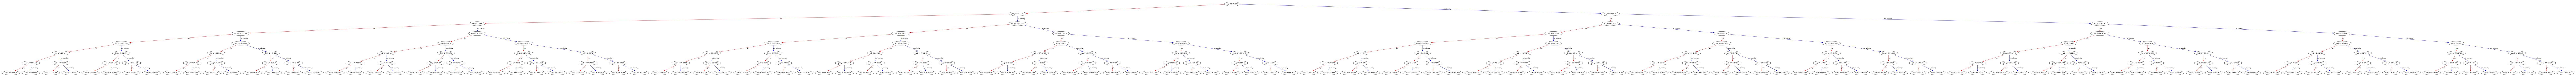

In [11]:
grafico_decisiones(model)

In [12]:
precision(model, X_test, y_test)

Precisión del modelo: 94.28%


In [13]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.5
matriz = confusion(y_test, y_pred)
pd.DataFrame(matriz)

,0,1
0,63548,10090
1,7165,221083


In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1_score(y_test, y_pred>0.5)

In [14]:
eficiencia_antes = eficiencia_corte_matriz(matriz)
print(eficiencia_corte_matriz(matriz))

0.23423742737324685


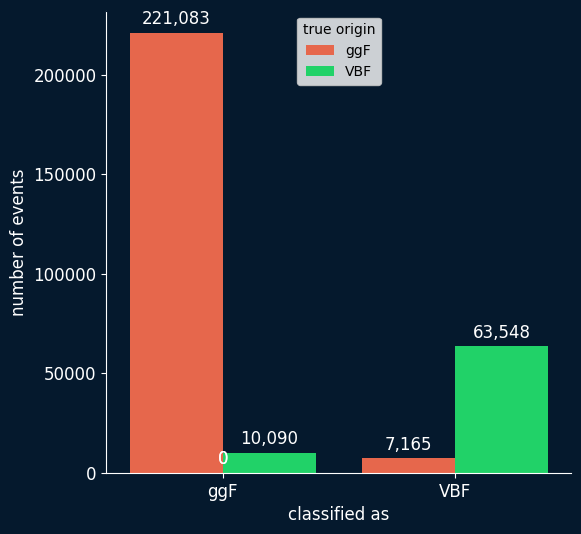

In [15]:
plot_confusion_barras(matriz, normalizado=False)

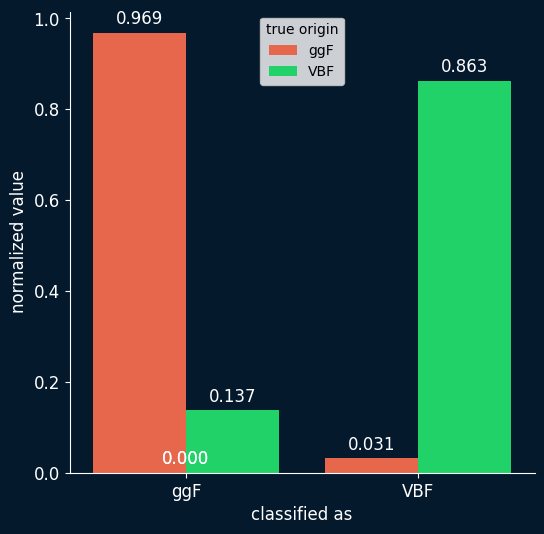

In [16]:
plot_confusion_barras(matriz)

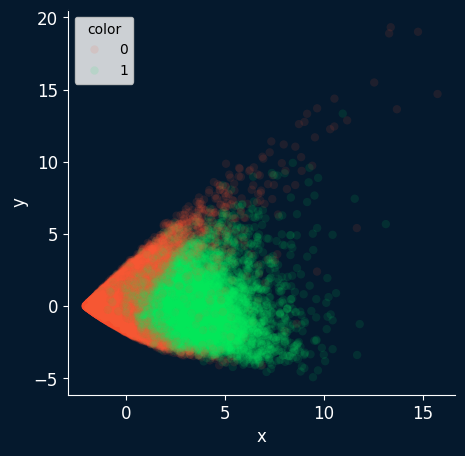

In [17]:
plot_pca_2D(model, 
            df_X.sample(100000, random_state=123), 
            df_y.sample(100000, random_state=123))

In [18]:
y_pred_all = model.predict(X_test)>0.5

In [19]:
y_pred = pd.DataFrame(y_pred_all).sample(100000, random_state=123)

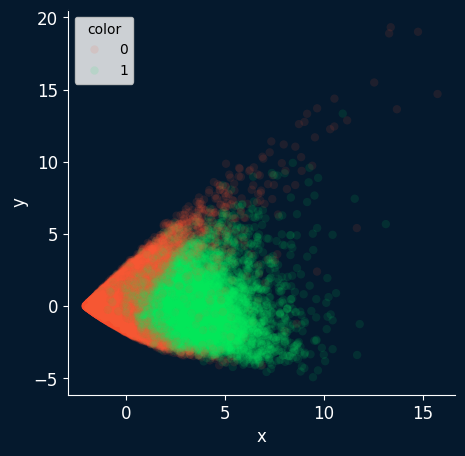

In [20]:
plot_pca_2D(model, 
            df_X.sample(100000, random_state=123), 
            df_y.sample(100000, random_state=123))
        #  pd.DataFrame(modelo.predict(df_X)).sample(100000, random_state=123))

# AQUI HAGO EL CORTE SOBRE 0.9TeV

In [21]:
df_X = df_ml2.drop(['origin_VBF'], axis=1) 
df_y = df_ml2[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3, random_state=228)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5, random_state=228)
# X_test, y_test = X_metrico, y_metrico 

mjj


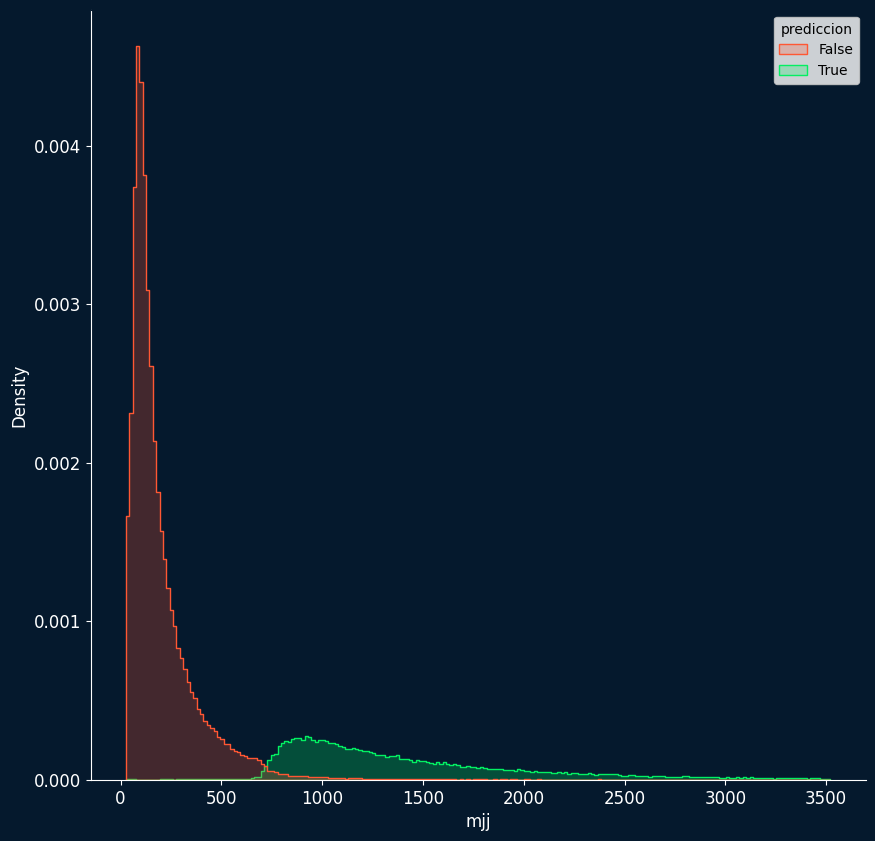

detajj


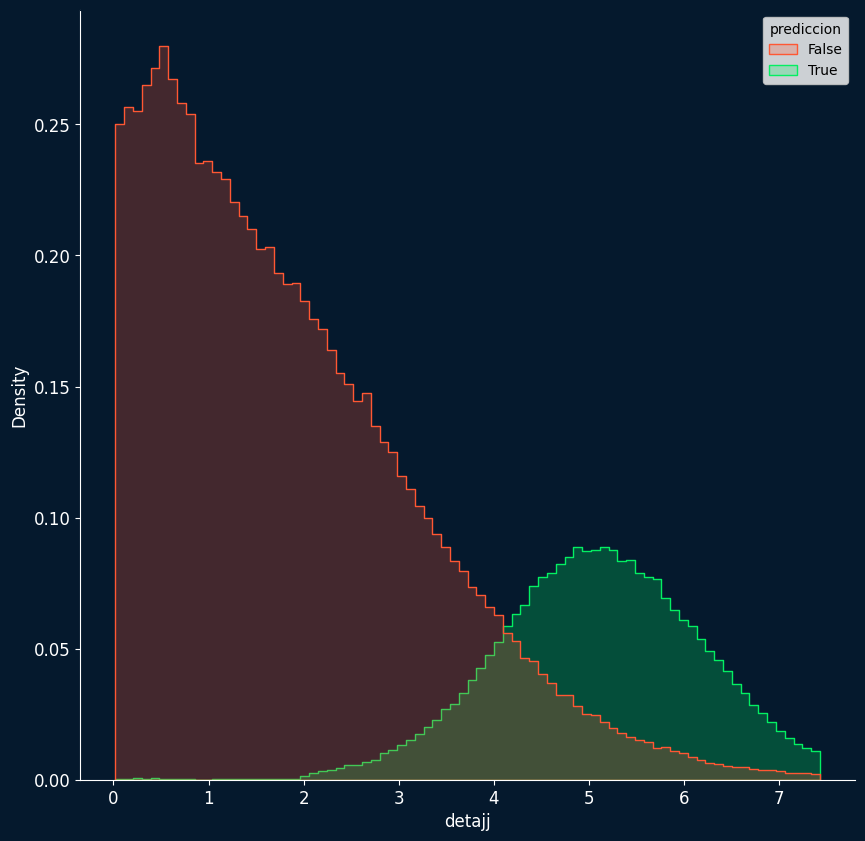

jet1_pt


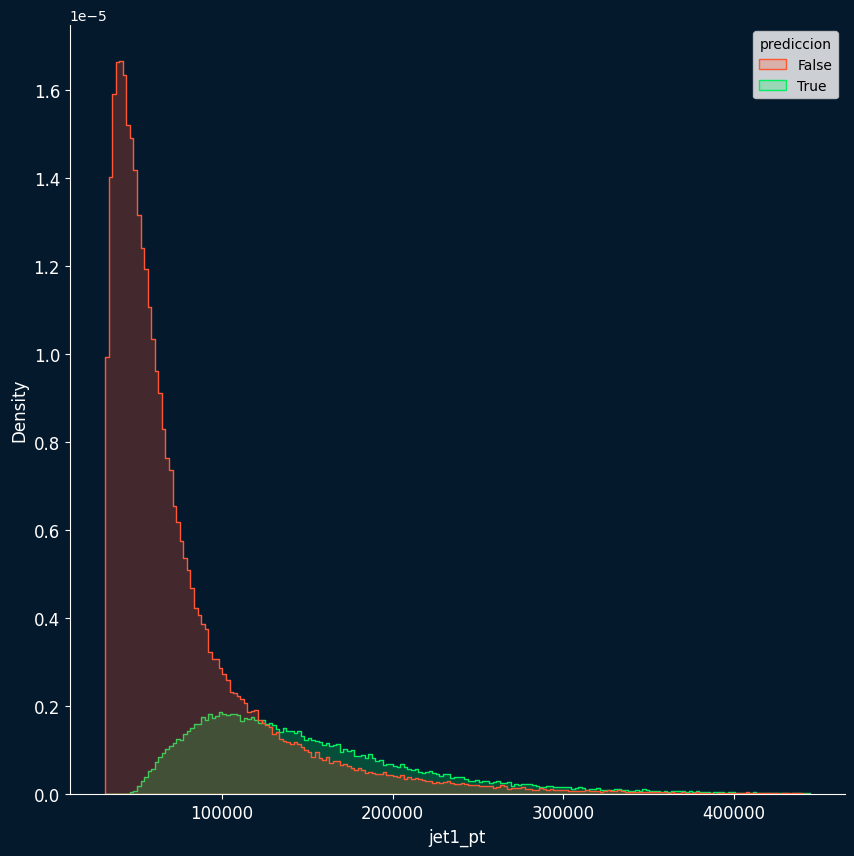

jet1_e


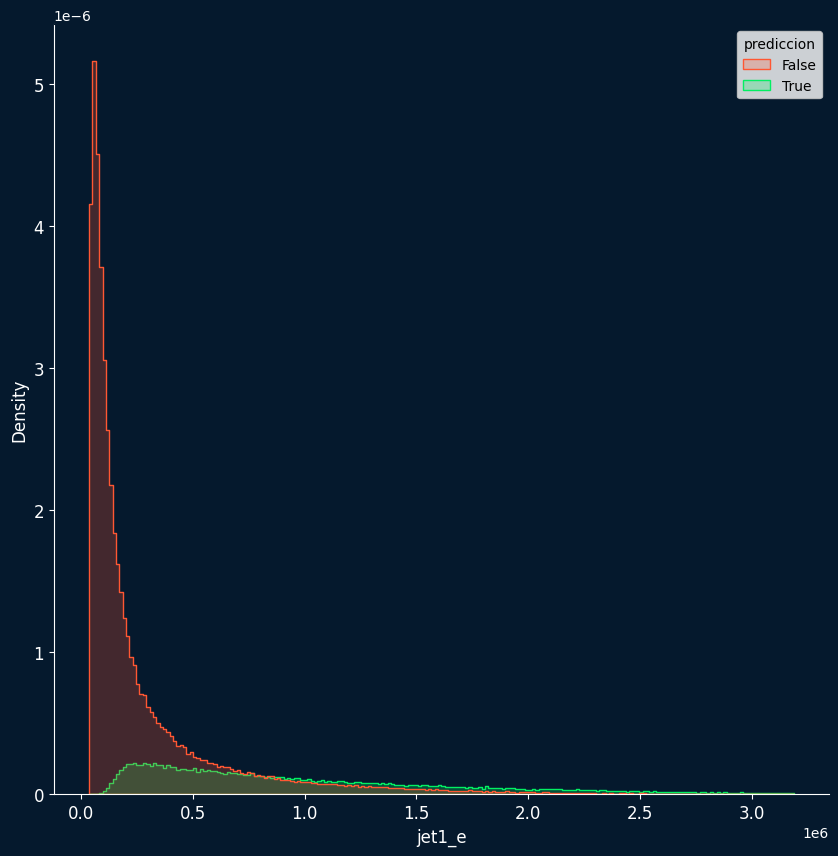

jet2_pt


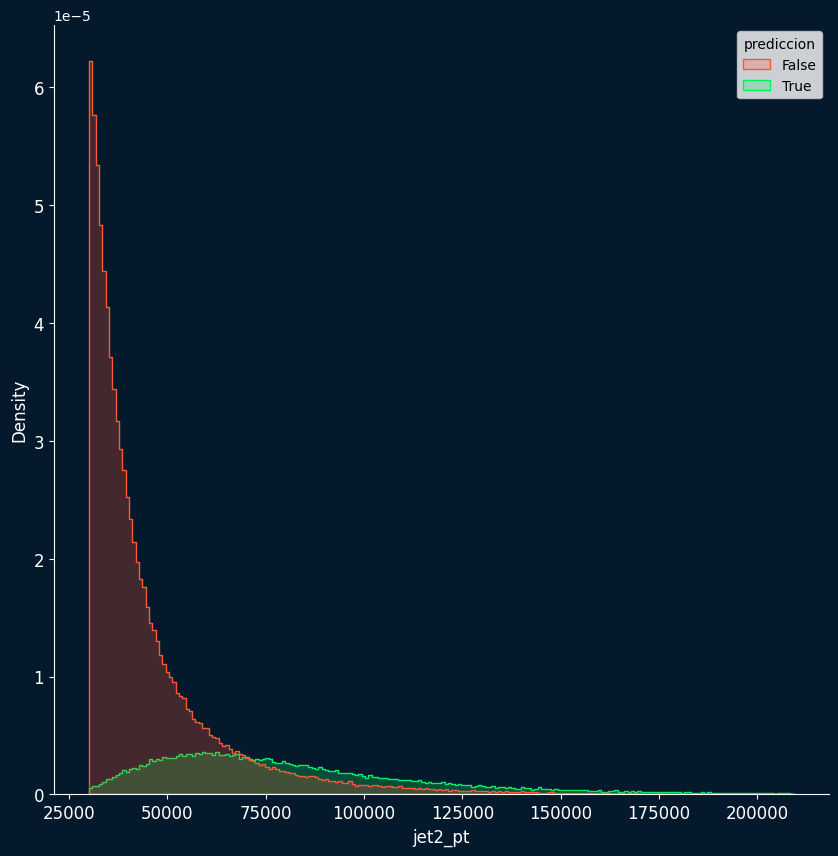

jet2_e


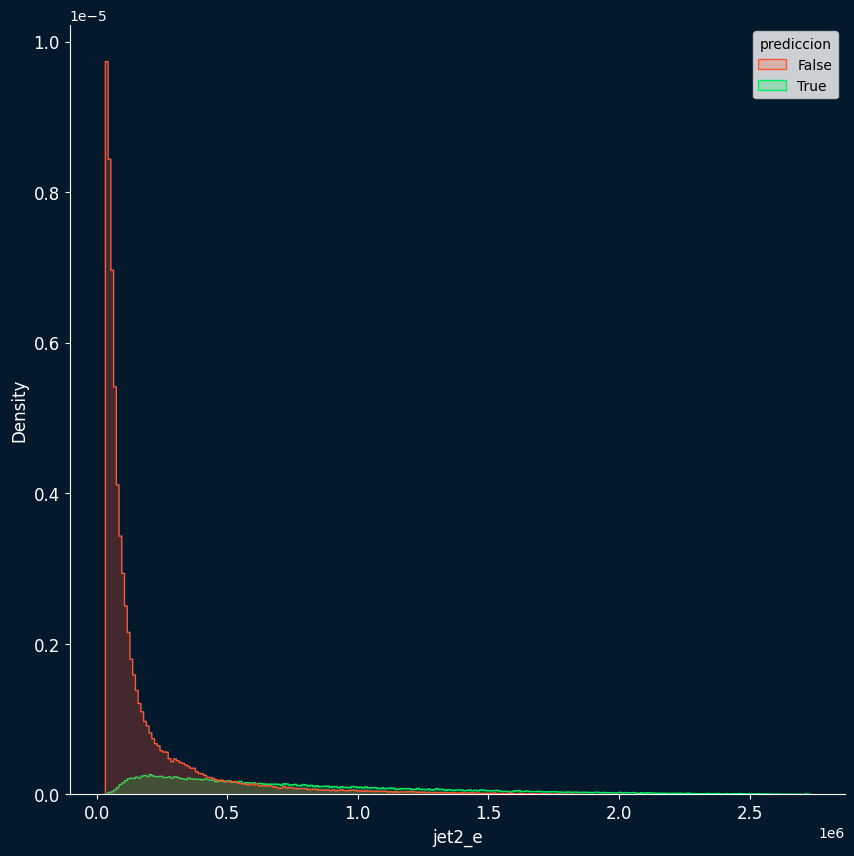

prediccion


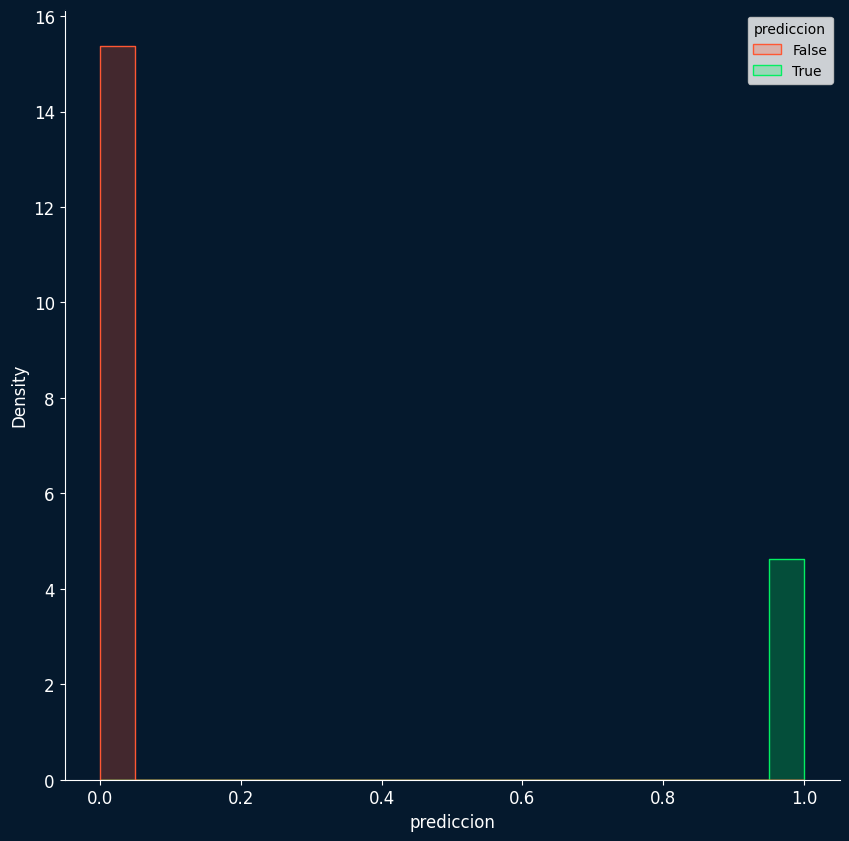

In [22]:
# df_ml3 = df_ml2
df_ml3 = X_test.copy(deep=True)
try: 
    df_ml3 = df_ml3.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
try: 
    df_ml3 = df_ml3.drop(['origin_VBF'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
df_ml3['prediccion'] = model.predict(df_ml3)>0.5
graficar_todos_datos(df_ml3, color='prediccion')

In [23]:
# df_plot = df_X[(df_X > df_X.quantile(0.005)) & (df_X < df_X.quantile(0.995))]

# df_plot.hist(bins=30, figsize=(15, 10))

In [24]:
X_test

,mjj,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e
477820,156.665558,0.175471,102589.546875,5.238233e+05,63372.847656,2.726207e+05
106701,985.237122,3.938118,136629.203125,1.032306e+06,133119.453125,2.472812e+05
1658700,130.434753,2.117213,48260.777344,5.535693e+04,34931.710938,9.324513e+04
1581662,72.103348,1.603186,35464.519531,1.960672e+05,30547.378906,8.318346e+05
1782376,86.173325,0.631843,43922.863281,8.553126e+04,37078.312500,1.281706e+05
...,...,...,...,...,...,...
765646,51.312145,0.074475,67318.312500,7.122623e+04,50884.683594,5.491621e+04
166568,835.041748,3.921303,131433.171875,4.533566e+06,102193.843750,1.078795e+05
1530635,179.693268,2.821691,52531.789062,5.653621e+04,32689.310547,1.906943e+05
510543,317.063721,0.137739,159212.281250,9.740976e+05,158498.593750,8.471716e+05


In [25]:
# X_val

In [26]:
# funcion que voy a usar para la clasificacion
# estop se va a aplicar a cada fila
def clasificacion_after(pred_VBF_modelo, pred_VBF_mjj):
    # si está por arriba de 0.9TeV, entonces es VBF
    if pred_VBF_mjj == 1:
        return 1
    # en otro caso mantengo la predicción, puede ser VBF o ggF
    else:
        return pred_VBF_modelo

# función que me entrega una predicción en base al corte original de ML y al corte en 0.9TeV
def aplicar_clasificacion_despues(modelo, df_x):
    # creo un df vacío
    df_comprobar = pd.DataFrame()
    
    # pongo la predicción del modelo en el df
    df_comprobar['pred_VBF_modelo'] = modelo.predict(df_x) # [:, 0]
    
    # pongo la predicción del filtro 0.9TeV en el df
    # filtro_mjj = df_x["mjj"] >= 900 # este es el bueno
    filtro_mjj = df_x["mjj"] >= 900
    df_comprobar['pred_VBF_mjj'] = np.where(filtro_mjj, 1, 0)

    # aplico la función que mostré antes para obtener la predicción final
    pred_VBF_modelo_y_mjj = df_comprobar.apply(lambda fila: clasificacion_after(fila['pred_VBF_modelo'], 
                                                                        fila['pred_VBF_mjj']), axis=1)
    
    # entrego la predicción final
    return pred_VBF_modelo_y_mjj

pred_VBF_modelo_y_mjj = aplicar_clasificacion_despues(model, X_test)
pred_VBF_modelo_y_mjj

0         0.116670
1         1.000000
2         0.000768
3         0.002599
4         0.001153
            ...   
301881    0.000890
301882    0.909483
301883    0.000918
301884    0.183714
301885    1.000000
Length: 301886, dtype: float64

In [27]:
y_pred_2 = pred_VBF_modelo_y_mjj.to_numpy()
y_pred_2 = y_pred_2>0.5
matriz_2 = confusion(y_test, y_pred_2)
pd.DataFrame(matriz_2)

,0,1
0,64079,9559
1,8734,219514


In [28]:
print(eficiencia_corte_matriz(matriz_2))

0.24119369563345103


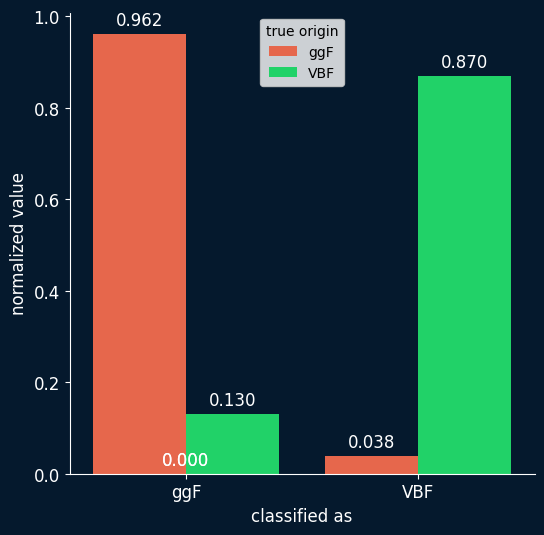

In [29]:
plot_confusion_barras(matriz_2)

In [30]:
precision(model, X_test, y_test)

Precisión del modelo: 94.28%


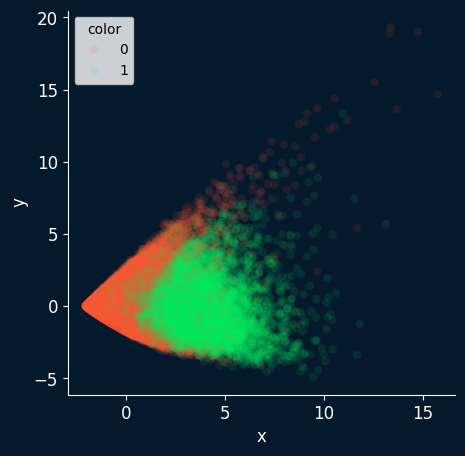

In [31]:
plot_pca_2D(model, 
            df_X.sample(100000, random_state=123), 
            df_y.sample(100000, random_state=123))

mjj


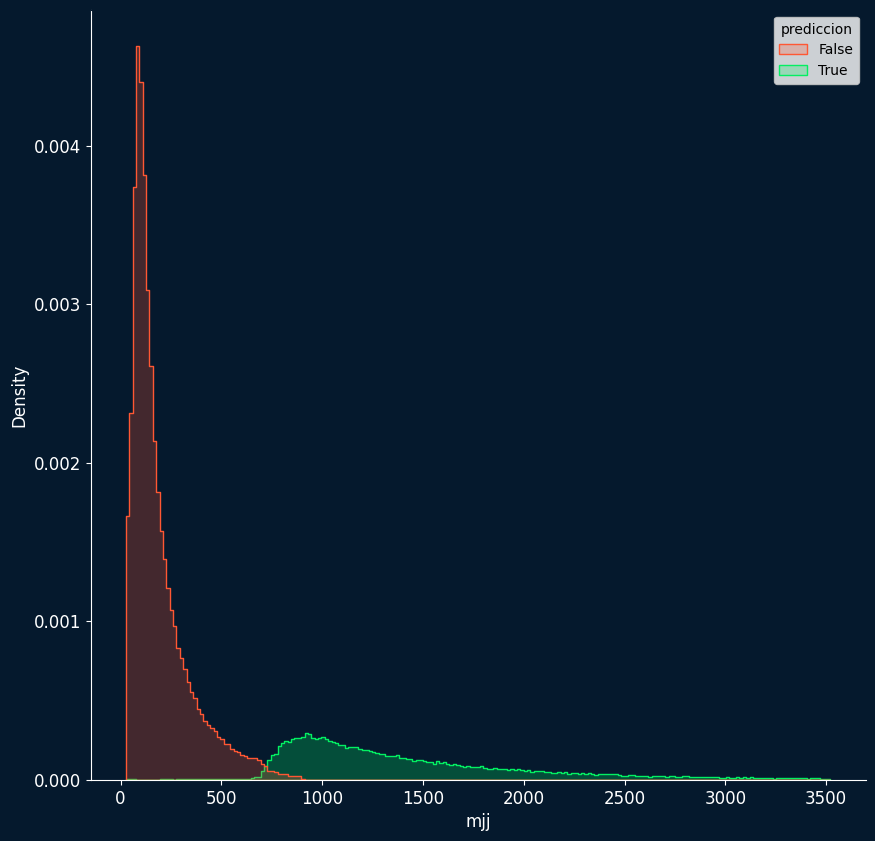

detajj


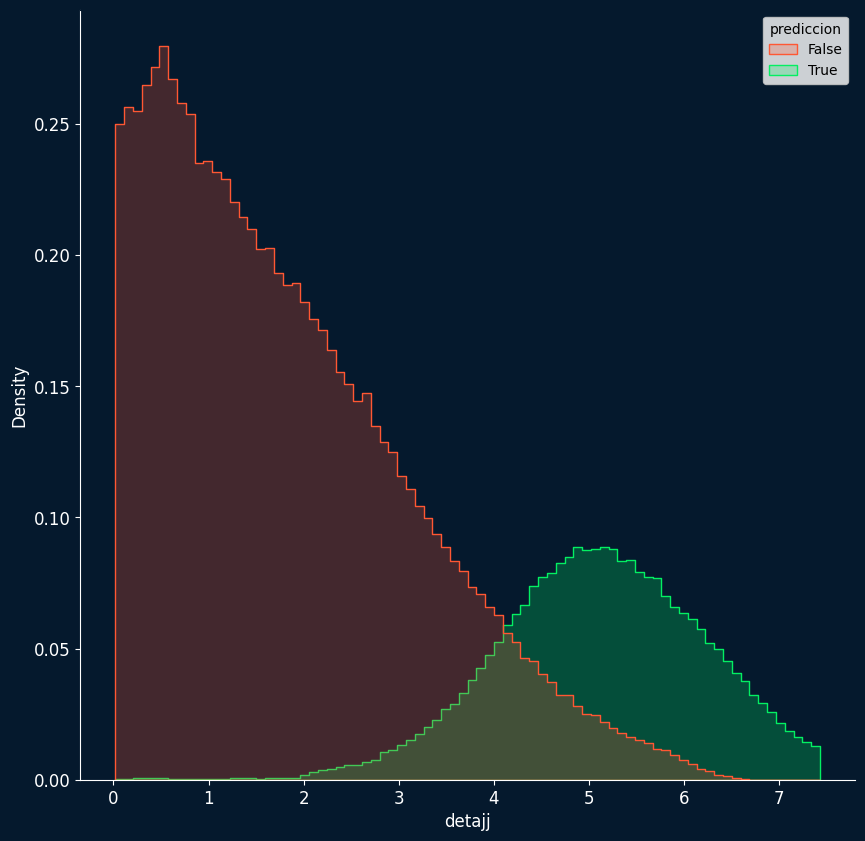

jet1_pt


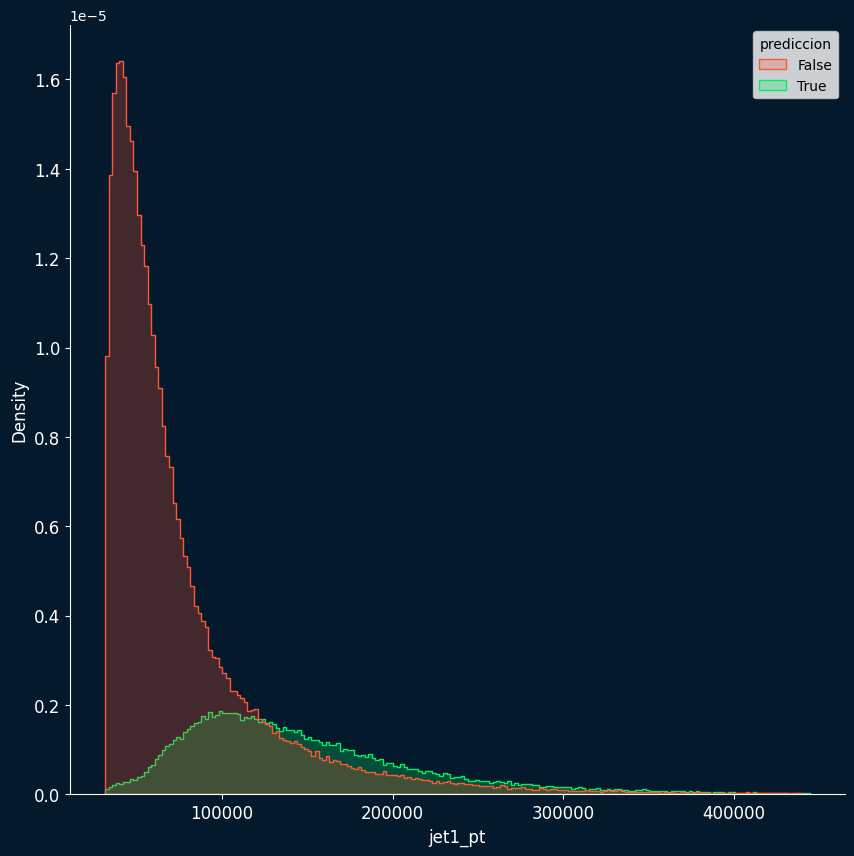

jet1_e


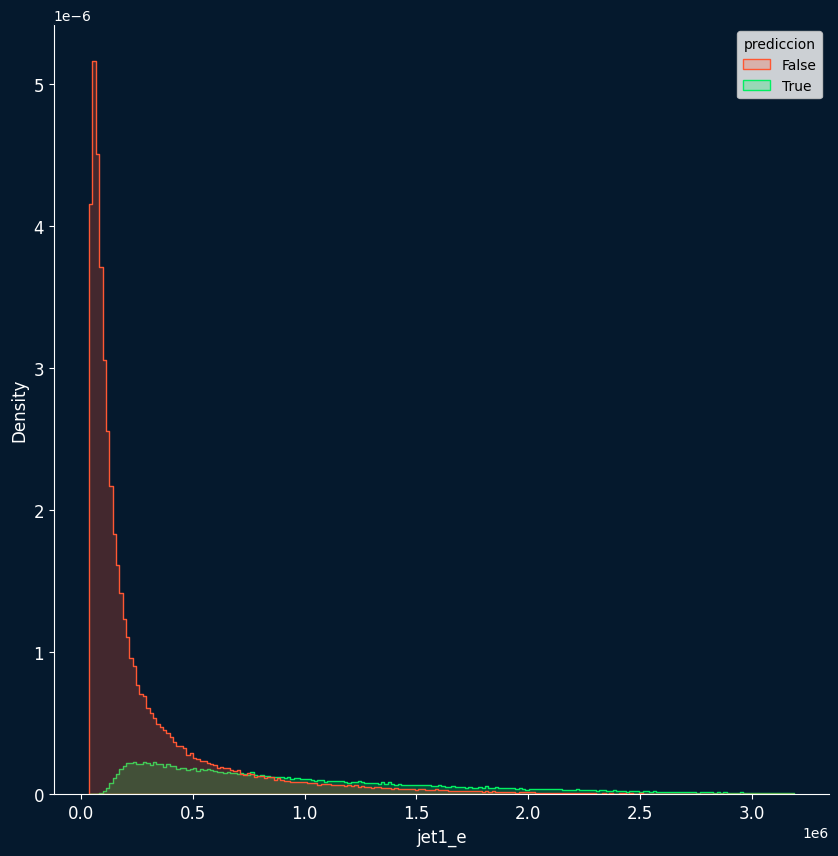

jet2_pt


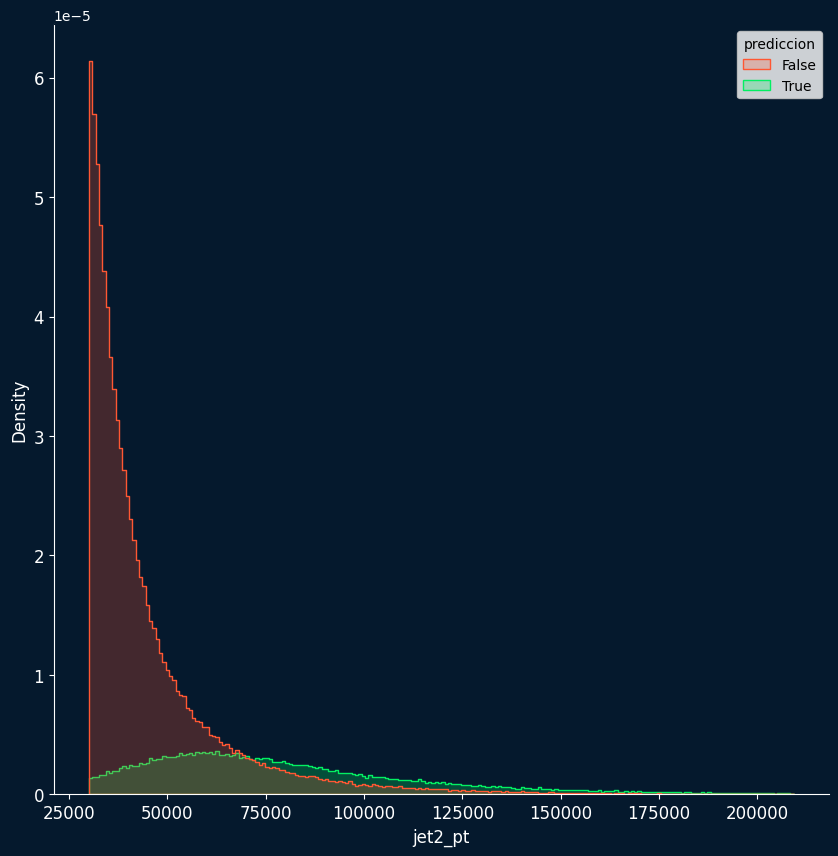

jet2_e


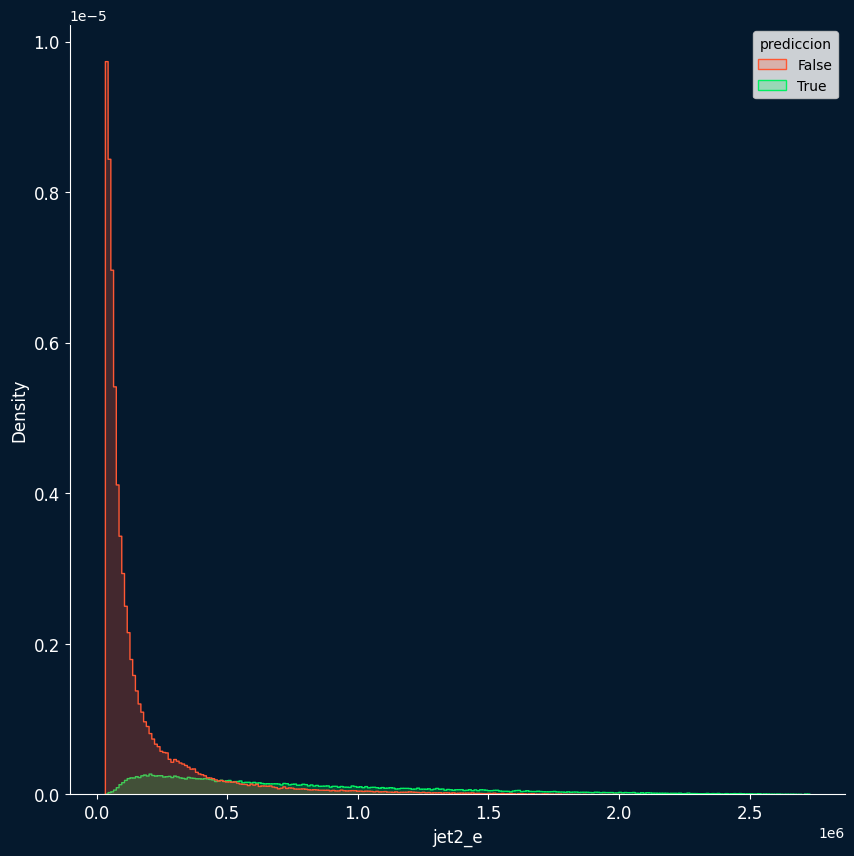

prediccion


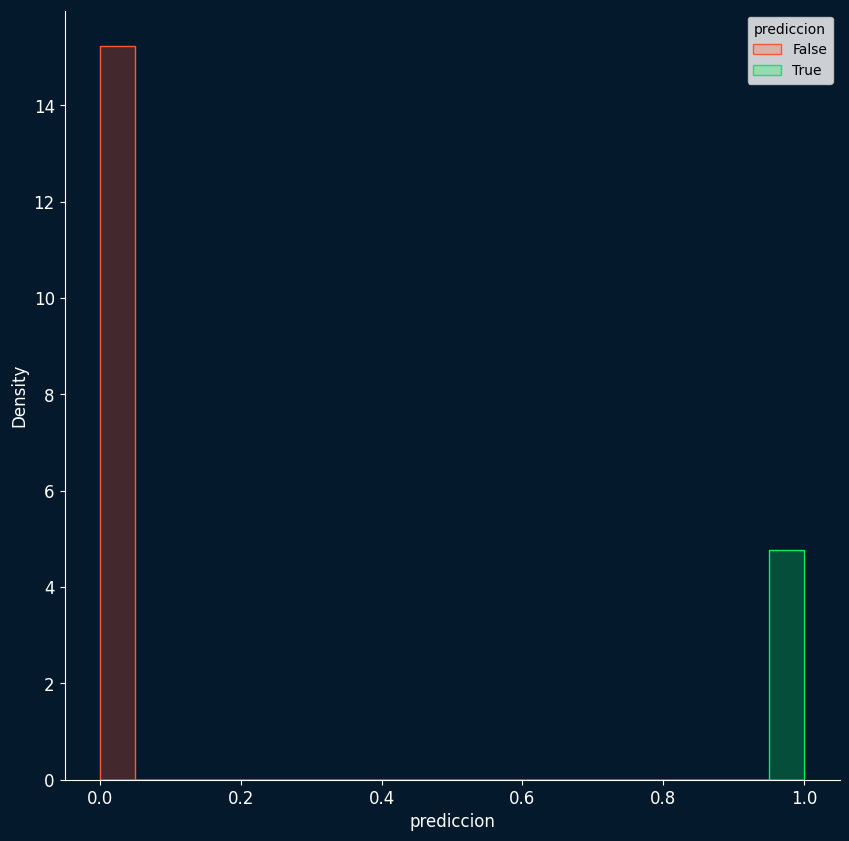

In [32]:
df_ml4 = X_test.copy(deep=True)
df_ml4 = df_ml4.reset_index(drop=True) # tengo que poner eso porque al ser elegido aleatoriamente, los indices quedan aleatorios y causa problemas con otros df en la función que sigue
try: 
    df_ml4 = df_ml4.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
df_ml4['prediccion'] = aplicar_clasificacion_despues(model, df_ml4)>0.5
graficar_todos_datos(df_ml4, color='prediccion')

# QUE PASA SI HAGO EL CORTE 0.9 AHORA?

In [46]:
print(df_ml2[df_ml2['mjj'] > 900].count()/df_ml2.count())

mjj           0.199006
detajj        0.199006
jet1_pt       0.199006
jet1_e        0.199006
jet2_pt       0.199006
jet2_e        0.199006
origin_VBF    0.199006
dtype: float64


mjj


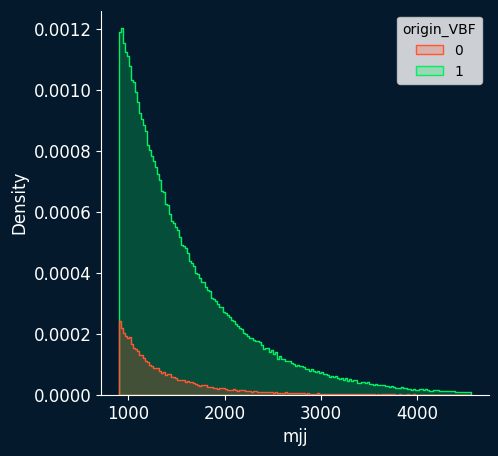

detajj


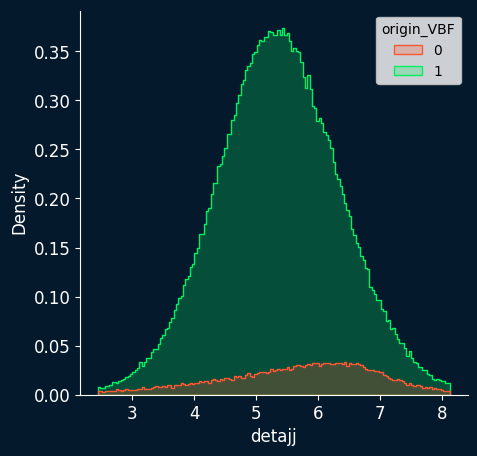

jet1_pt


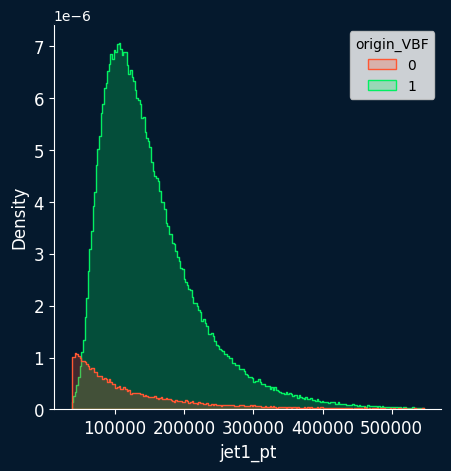

jet1_e


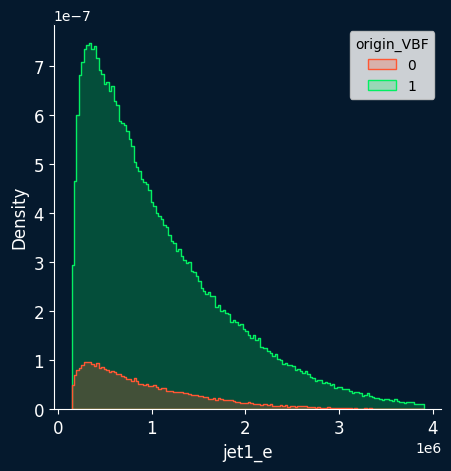

jet2_pt


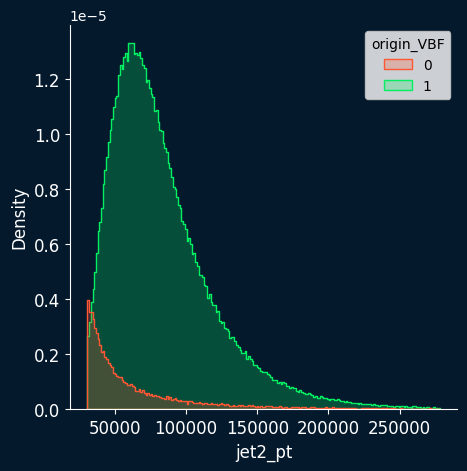

jet2_e


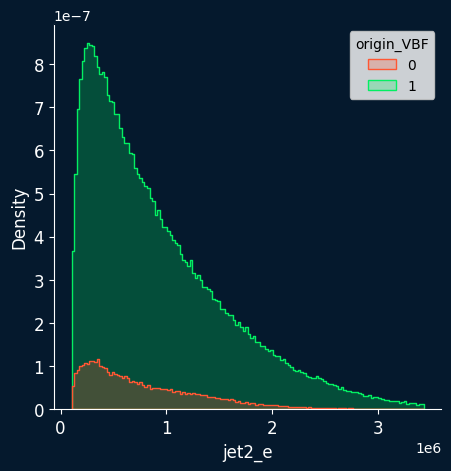

origin_VBF


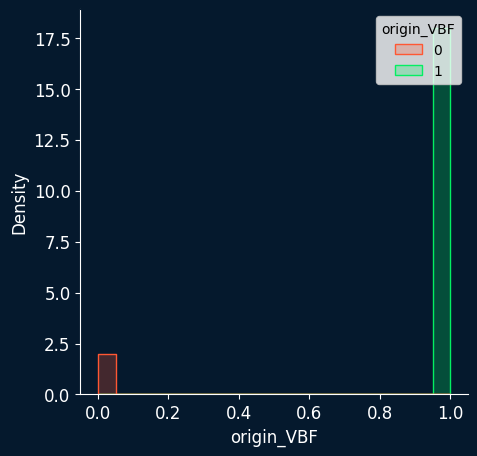

In [49]:
df_ml5 = df_ml2[df_ml2['mjj'] > 900].copy(deep=True)
df_X_5 = df_ml5.drop(['origin_VBF'], axis=1) 
df_y_5 = df_ml5[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train_5, X_metrico_5, y_train_5, y_metrico_5 = train_test_split(df_X_5, df_y_5, test_size=0.3, random_state=228)
X_test_5, X_val_5, y_test_5, y_val_5 = train_test_split(X_metrico_5, y_metrico_5, test_size=0.5, random_state=228)
graficar_todos_datos(df_ml5, color='origin_VBF')

In [34]:
X_test_5[X_test_5['mjj']>900].describe()

,mjj,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e
count,60077.000000,60077.000000,6.007700e+04,6.007700e+04,60077.000000,6.007700e+04
mean,1598.689575,5.386377,1.518811e+05,1.072183e+06,83466.437500,9.271103e+05
std,701.437622,1.057382,8.798320e+04,7.823804e+05,44176.574219,6.875722e+05
min,900.000732,0.024695,3.005420e+04,9.184362e+04,30002.447266,4.832735e+04
25%,1097.088135,4.703257,9.564443e+04,4.726216e+05,54909.808594,3.951161e+05
50%,1377.965088,5.382225,1.314547e+05,8.528389e+05,73528.703125,7.408839e+05
75%,1864.820557,6.082702,1.828731e+05,1.471111e+06,99656.570312,1.284922e+06
max,8305.770508,9.194850,1.768984e+06,6.061900e+06,977842.625000,5.364323e+06


In [35]:
precision(model, X_test_5, y_test_5)

Precisión del modelo: 91.76%


In [50]:
from sklearn.metrics import f1_score
y_pred_5 = model.predict(X_test_5)
f1_score(y_test_5, y_pred_5>0.5)

0.9557457234577175

In [41]:
y_pred_5 = model.predict(X_test_5)
y_pred_5 = y_pred_5>0.5
matriz_5 = confusion(y_test_5, y_pred_5)
pd.DataFrame(matriz_5)

,0,1
0,53441,541
1,4408,1687


In [42]:
eficiencia_antes = eficiencia_corte_matriz(matriz_5)
print(eficiencia_corte_matriz(matriz_5))

0.9629142600329577


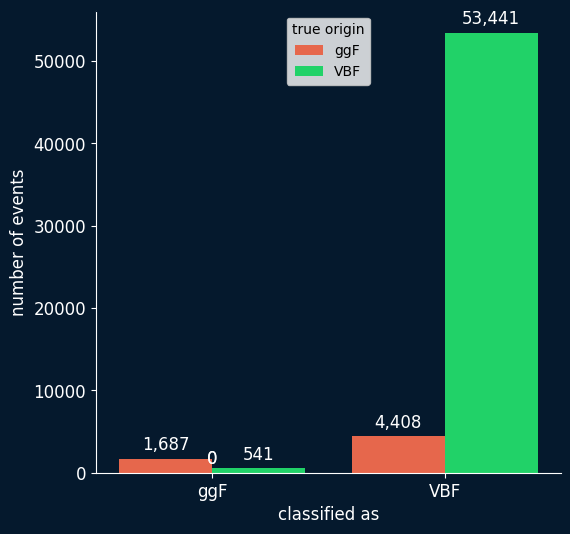

In [48]:
plot_confusion_barras(matriz_5, normalizado=False)

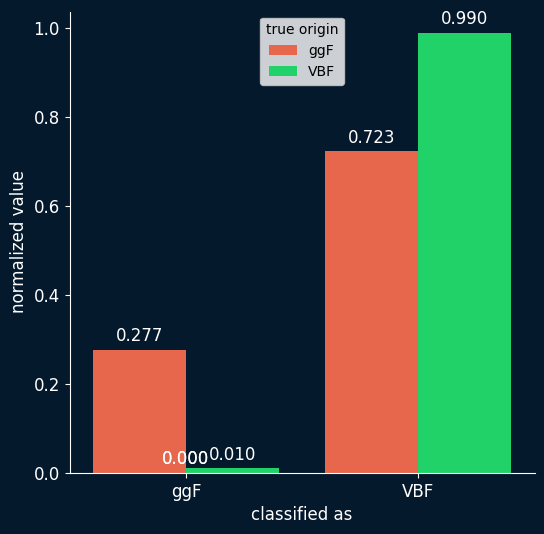

In [43]:
plot_confusion_barras(matriz_5)

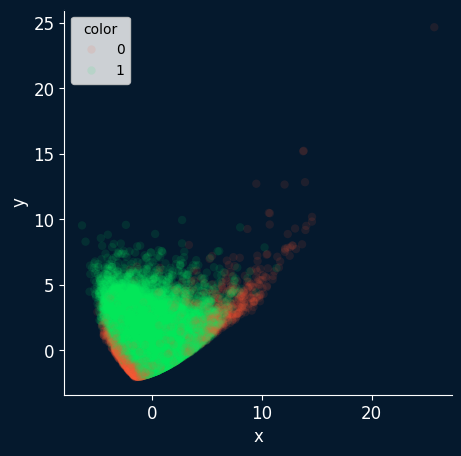

In [44]:
plot_pca_2D(model, 
            df_X_5.sample(100000, random_state=123), 
            df_y_5.sample(100000, random_state=123))

0        True
1        True
2        True
3        True
4        True
         ... 
60184    True
60185    True
60186    True
60187    True
60188    True
Name: prediccion, Length: 60189, dtype: bool
mjj


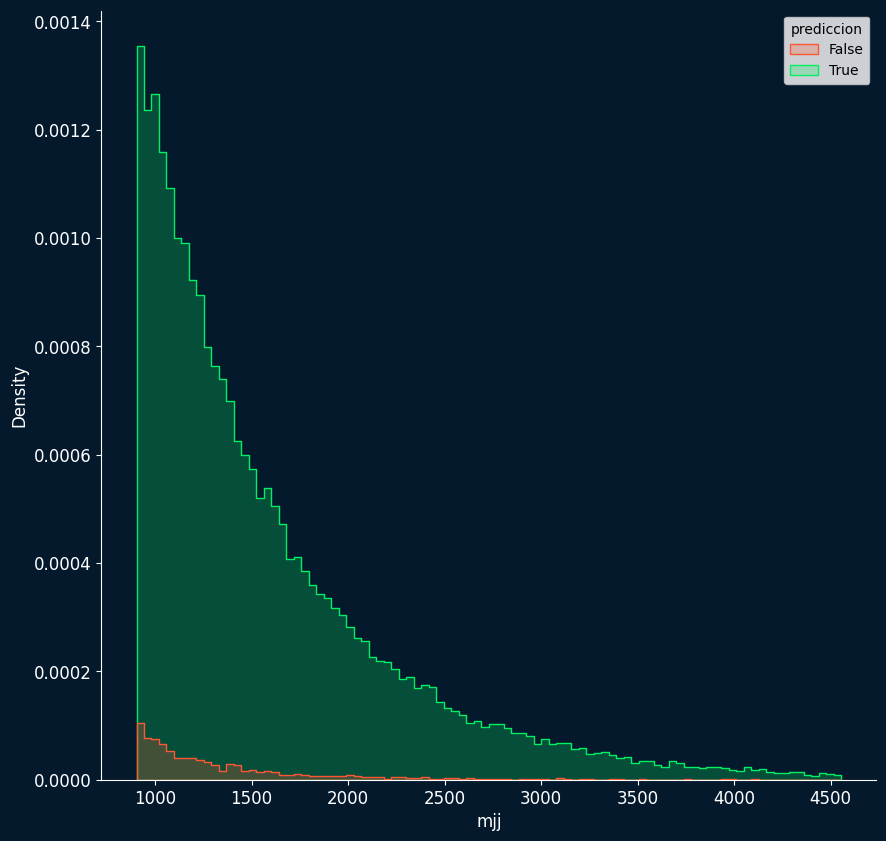

detajj


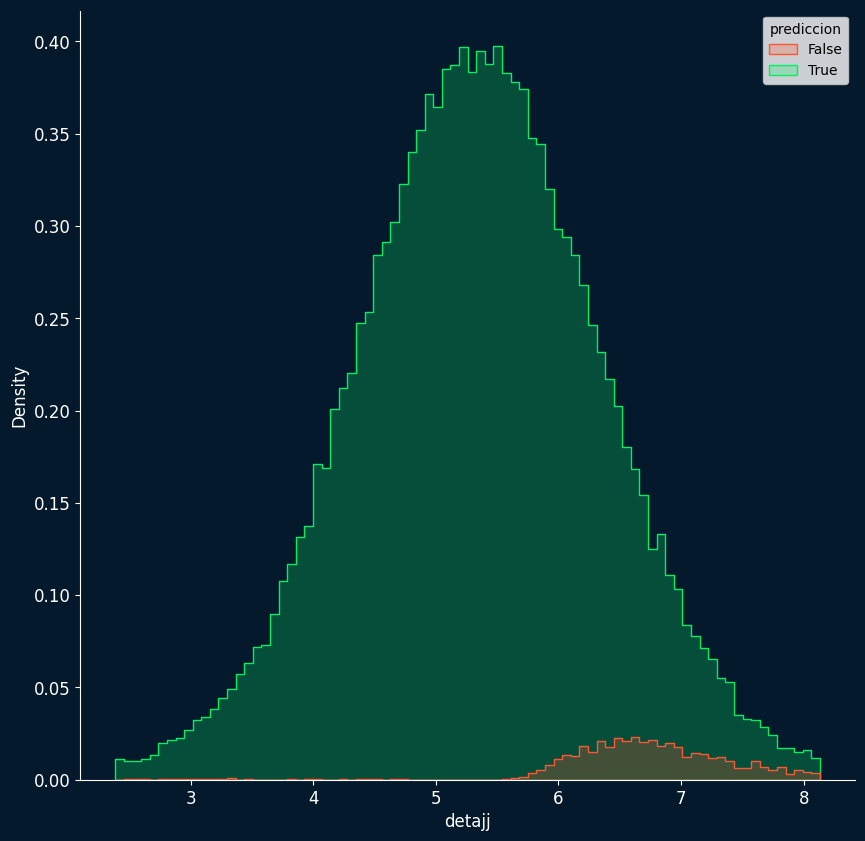

jet1_pt


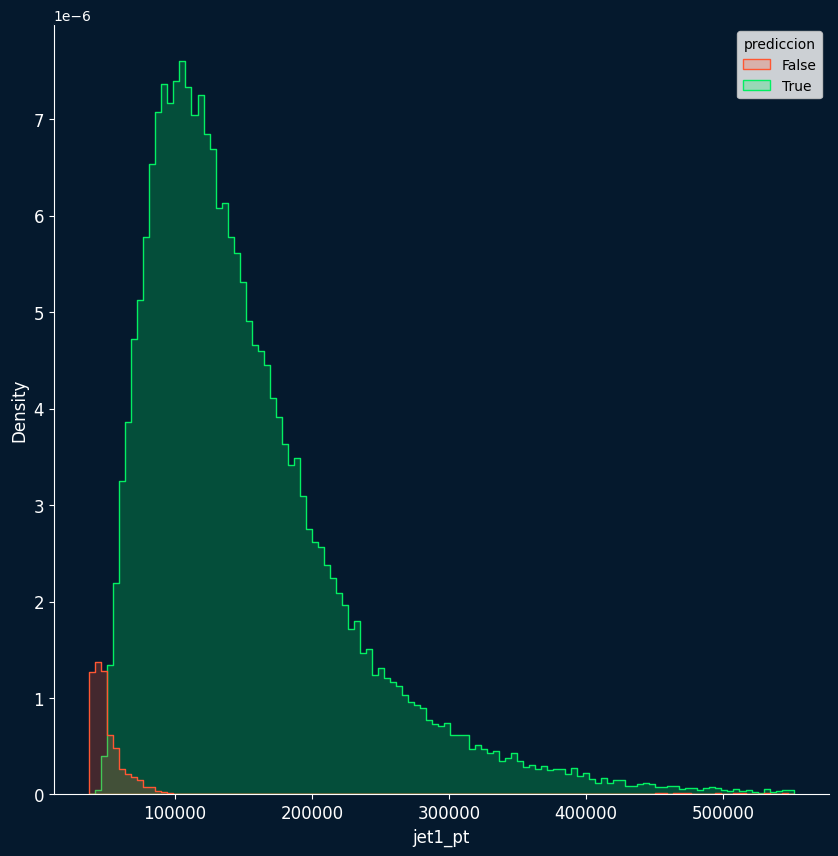

jet1_e


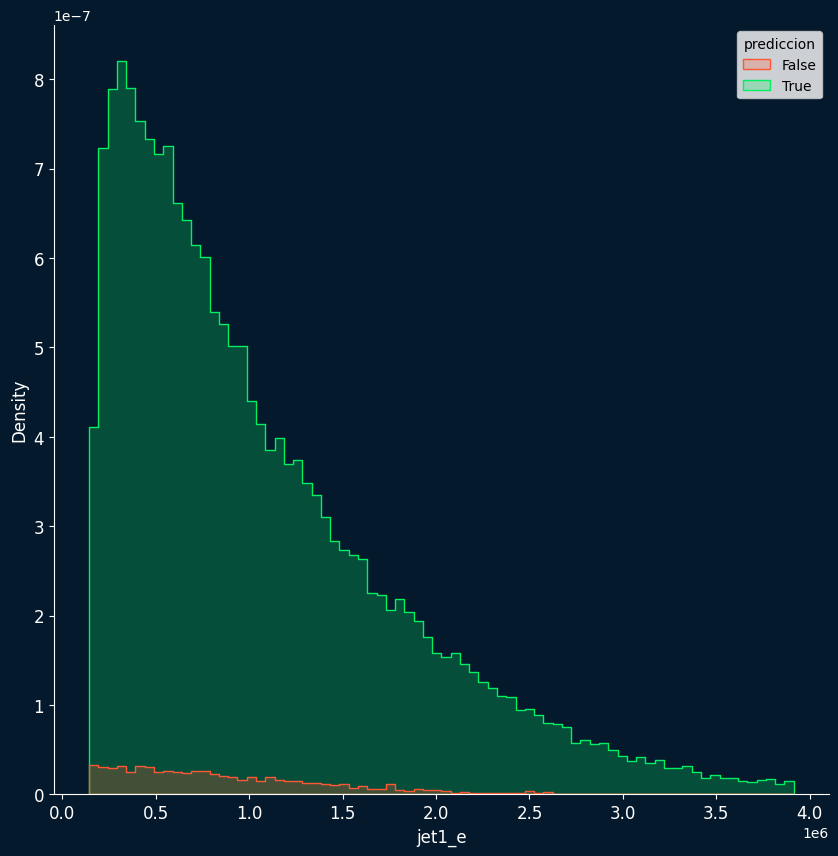

jet2_pt


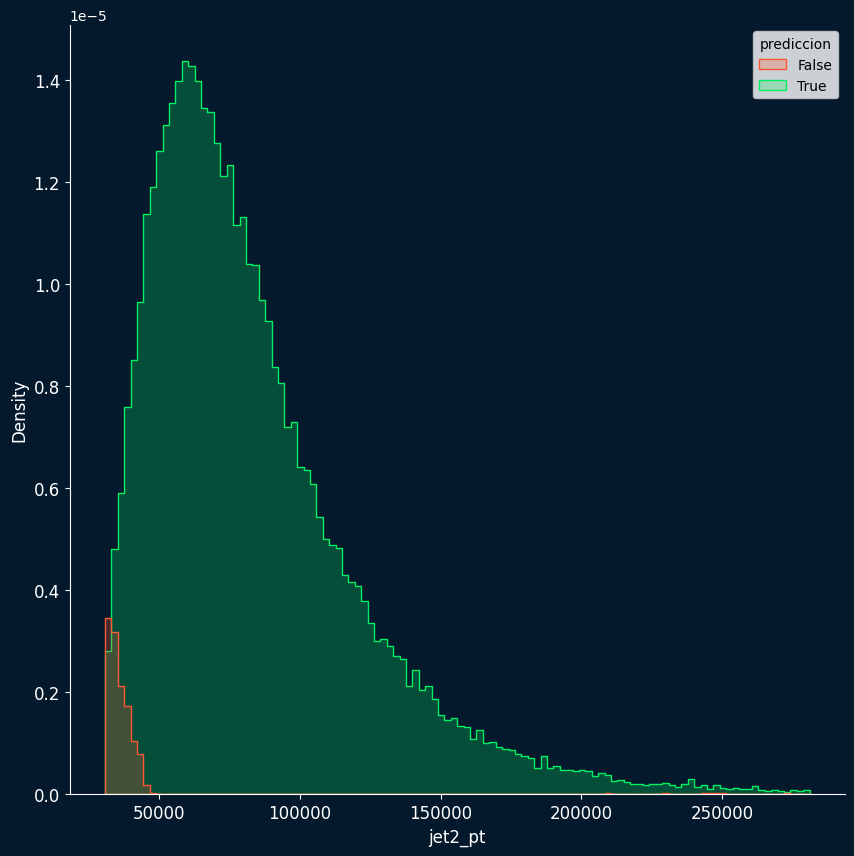

jet2_e


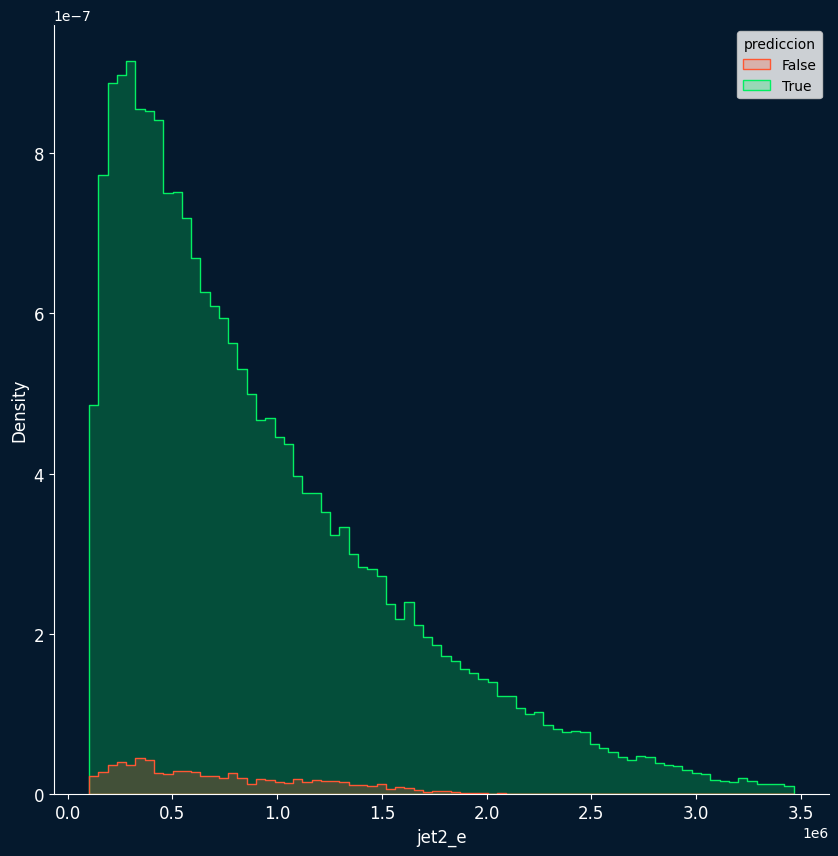

prediccion


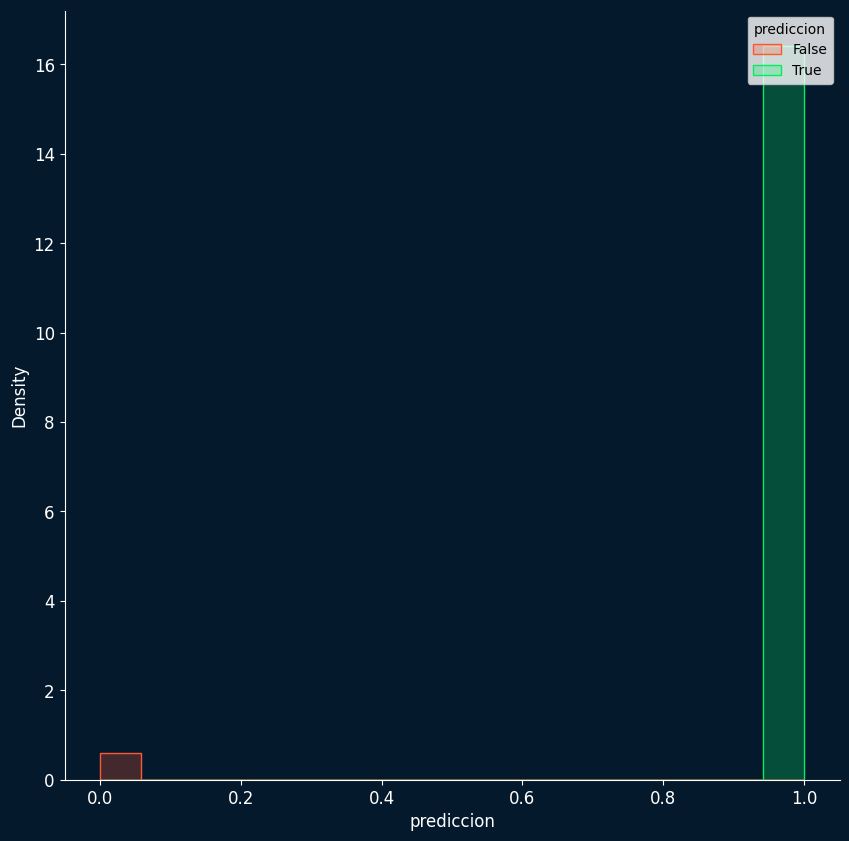

In [45]:
df_ml6 = X_test[X_test['mjj']>900].copy(deep=True)
df_ml6 = df_ml6.reset_index(drop=True) # tengo que poner eso porque al ser elegido aleatoriamente, los indices quedan aleatorios y causa problemas con otros df en la función que sigue
try: 
    df_ml6 = df_ml6.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    # df_ml6['prediccion'] = aplicar_clasificacion_despues(model, df_ml6)
    df_ml6['prediccion'] = model.predict(df_ml6)>0.5
print(df_ml6['prediccion'])
graficar_todos_datos(df_ml6, color='prediccion')